Using cache found in C:\Users\wayan/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-7-7 Python-3.10.9 torch-2.0.1 CUDA:0 (NVIDIA GeForce 920MX, 2048MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients
Adding AutoShape... 


Objek yang terdeteksi adalah 3 person, 2 bench, 2 car


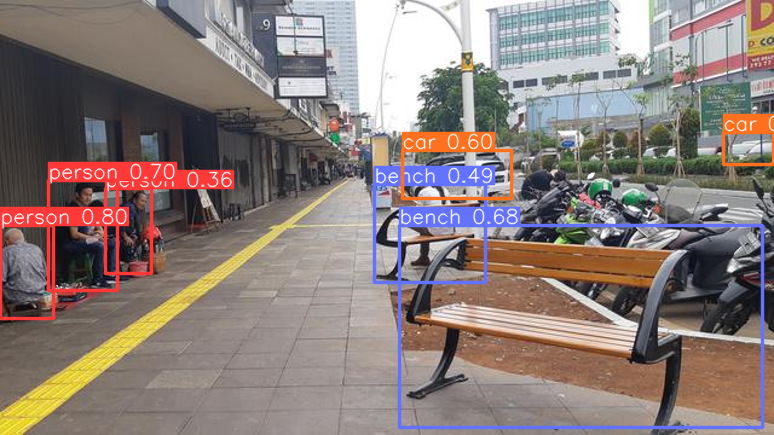

In [22]:
import torch
from PIL import Image
from pathlib import Path
import urllib

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5n')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Load gambar
image_path = 'test.jpg'
image = Image.open(image_path)

# Deteksi objek pada gambar
results = model(image)

# Ambil hasil deteksi objek
objects = results.pandas().xyxy[0]

# Hitung jumlah objek per kelas
class_counts = objects['name'].value_counts()

# Gabungkan objek yang terdeteksi dalam satu kalimat
output = "Objek yang terdeteksi adalah "
for idx, (class_name, count) in enumerate(class_counts.items()):
    output += f"{count} {class_name}"
    if idx < len(class_counts) - 1:
        output += ", "

# Tampilkan hasil deteksi objek
print(output)

# Gambar hasil deteksi objek pada gambar
results.show()


In [24]:
!pip install gTTS

                                              0.0/98.2 kB ? eta -:--:--
     -----------------------------            71.7/98.2 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 98.2/98.2 kB 1.4 MB/s eta 0:00:00


In [27]:
!pip install pygame

                                              0.0/10.5 MB ? eta -:--:--
                                              0.1/10.5 MB 3.3 MB/s eta 0:00:04
     -                                        0.3/10.5 MB 3.5 MB/s eta 0:00:03
     -                                        0.5/10.5 MB 3.5 MB/s eta 0:00:03
     --                                       0.6/10.5 MB 3.7 MB/s eta 0:00:03
     --                                       0.8/10.5 MB 3.8 MB/s eta 0:00:03
     ---                                      1.0/10.5 MB 3.8 MB/s eta 0:00:03
     ----                                     1.2/10.5 MB 3.9 MB/s eta 0:00:03
     -----                                    1.4/10.5 MB 4.0 MB/s eta 0:00:03
     ------                                   1.6/10.5 MB 4.0 MB/s eta 0:00:03
     ------                                   1.8/10.5 MB 4.0 MB/s eta 0:00:03
     -------                                  1.9/10.5 MB 4.1 MB/s eta 0:00:03
     --------                                 2.2/10.5 MB 3

In [ ]:
import torch
from PIL import Image
from pathlib import Path
import urllib

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5x')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Load gambar
image_path = 'test.jpg'
image = Image.open(image_path)

# Deteksi objek pada gambar
results = model(image)

# Ambil hasil deteksi objek
objects = results.pandas().xyxy[0]

# Tampilkan hasil deteksi objek
print(objects)

# Kamus terjemahan label
label_translation = {
    'person': 'orang',
    'car': 'mobil',
    'bus': 'bus',
    'bicycle': 'sepeda',
    'motorcycle': 'motor',
    # Tambahkan label terjemahan lain sesuai kebutuhan
}

# Terjemahkan label objek
translated_objects = [label_translation.get(label, label) for label in objects['name']]

# Hitung jumlah objek per kelas
class_counts = objects['name'].value_counts()

# Gabungkan objek yang terdeteksi dalam satu kalimat
output = "Objek yang terdeteksi adalah "
for idx, (class_name, count) in enumerate(class_counts.items()):
    translated_class_name = translated_objects[idx]
    output += f"{count} {translated_class_name}"
    if idx < len(class_counts) - 1:
        output += ", "
        
print(output)

# Gambar hasil deteksi objek pada gambar
results.show()


In [29]:
from gtts import gTTS
import os
import pygame

# Konversi teks menjadi suara menggunakan Google Text-to-Speech
tts = gTTS(output, lang='id')  # Menggunakan bahasa Indonesia (id)
tts.save('output.mp3')  # Menyimpan suara dalam file output.mp3


# Memutar suara secara otomatis menggunakan pygame
pygame.mixer.init()
pygame.mixer.music.load('output.mp3')
pygame.mixer.music.play()

# Menunggu sampai audio selesai diputar
while pygame.mixer.music.get_busy():
    continue

pygame 2.5.0 (SDL 2.28.0, Python 3.10.9)
Hello from the pygame community. https://www.pygame.org/contribute.html
